In [10]:
# Ignore noon harmful warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
path = pd.read_excel(r"C:\Users\anjus\Downloads\Superstore_USA.xlsx") 


In [31]:
path.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [32]:
path.shape

(9426, 24)

## Missing value analysis

In [39]:
path.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [40]:
# Filling missing values with mean

path["Product Base Margin"].fillna(path["Product Base Margin"].mean(), inplace = True)

In [41]:
path.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Univariate Analysis


## Analysis based on Order Priority

In [54]:
path["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [55]:
path["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [56]:
path["Order Priority"] = path["Order Priority"].replace('Critical ', 'Critical')

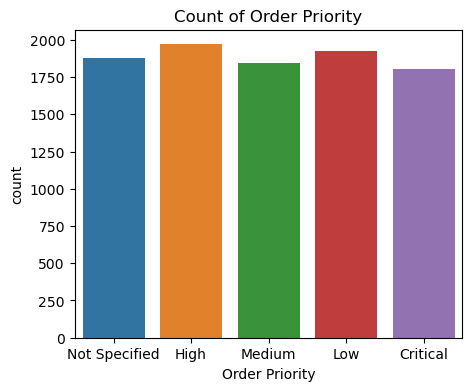

In [57]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Order Priority", data= path)
plt.title("Count of Order Priority")
plt.show()

## Shiping Mode Analysis

In [58]:
path['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [59]:
x = path['Ship Mode'].value_counts().index
y = path['Ship Mode'].value_counts().values

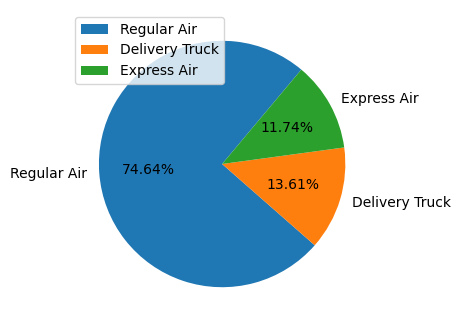

In [73]:
plt.figure(figsize = (5,4))
plt.pie(y, labels=x, startangle = 50, autopct = "%0.2f%%")
plt.legend(loc = 2)
plt.show()

# Bivariate Analysis

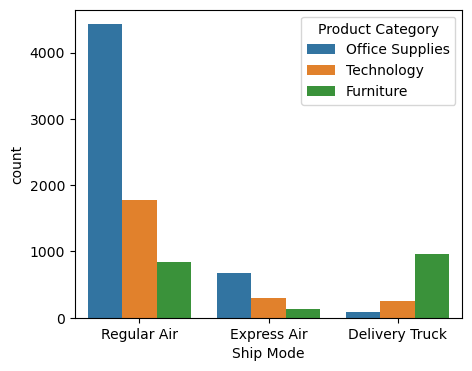

In [74]:
# Shipping mod analysis w.r.t product category

plt.figure(figsize = (5,4))
sns.countplot(x = 'Ship Mode', data = path, hue = 'Product Category')
plt.show()

## Customer Segment

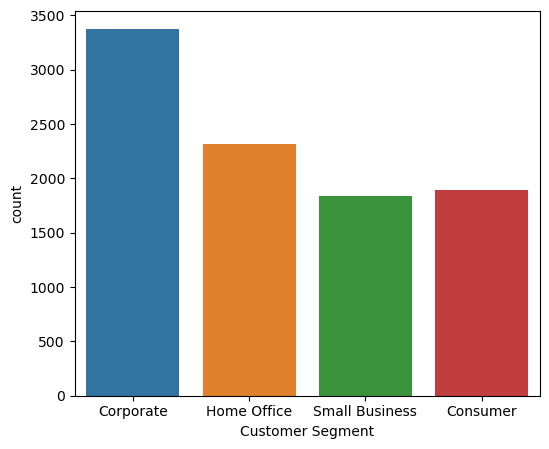

In [78]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'Customer Segment', data = path)
plt.show()

# Product Category

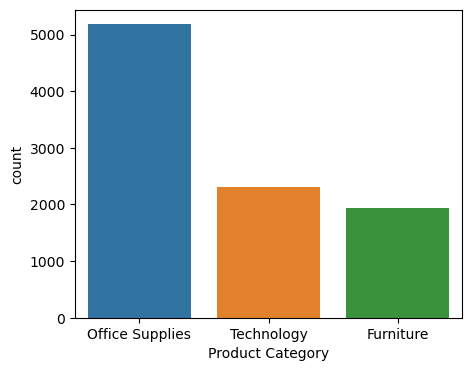

In [81]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Product Category', data = path)
plt.show()

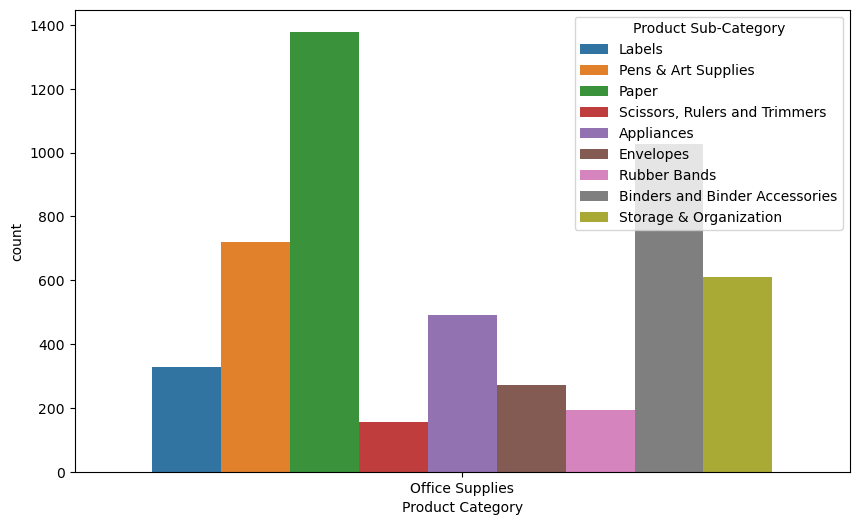

In [82]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Product Category', data = path[path['Product Category'] == 'Office Supplies'], hue = "Product Sub-Category")
plt.show()

In [83]:
path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

## Year wise analysis

In [87]:
path['Order Year'] = path['Order Date'].dt.year

In [88]:
path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [89]:
path['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

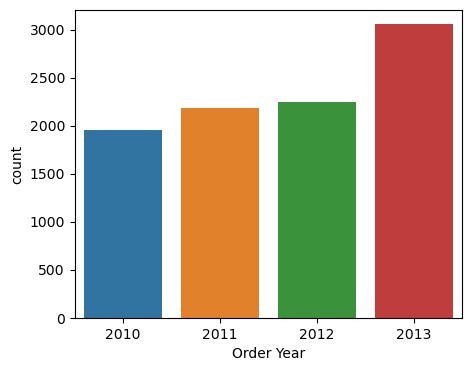

In [90]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Order Year', data = path)
plt.show()

## Profit for product category

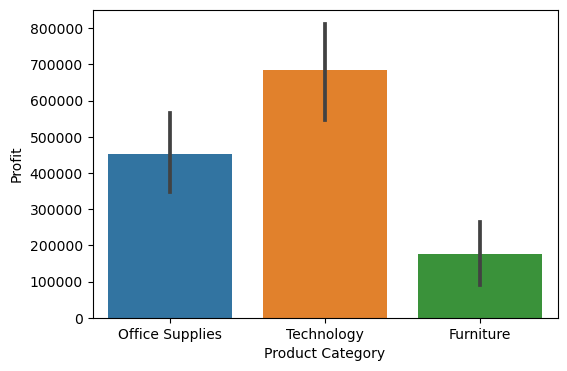

In [91]:
plt.figure(figsize = (6,4))
sns.barplot(x='Product Category', y = 'Profit', data = path, estimator='sum')
plt.show()

## Top 5 State analysis

In [94]:
path['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

## Product Base Margin

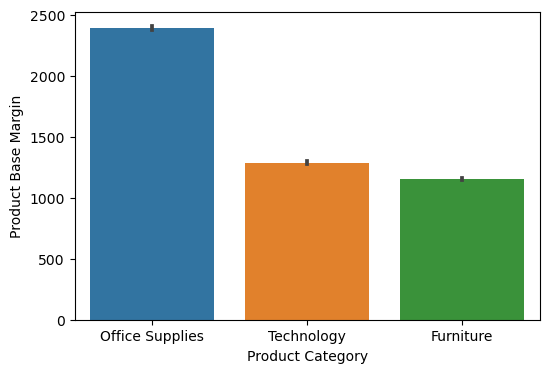

In [96]:
plt.figure(figsize = (6,4))
sns.barplot(x='Product Category', y = 'Product Base Margin', data = path, estimator='sum')
plt.show()